Train R²: 0.6452021313775149
Test R²: 0.5448997692667417


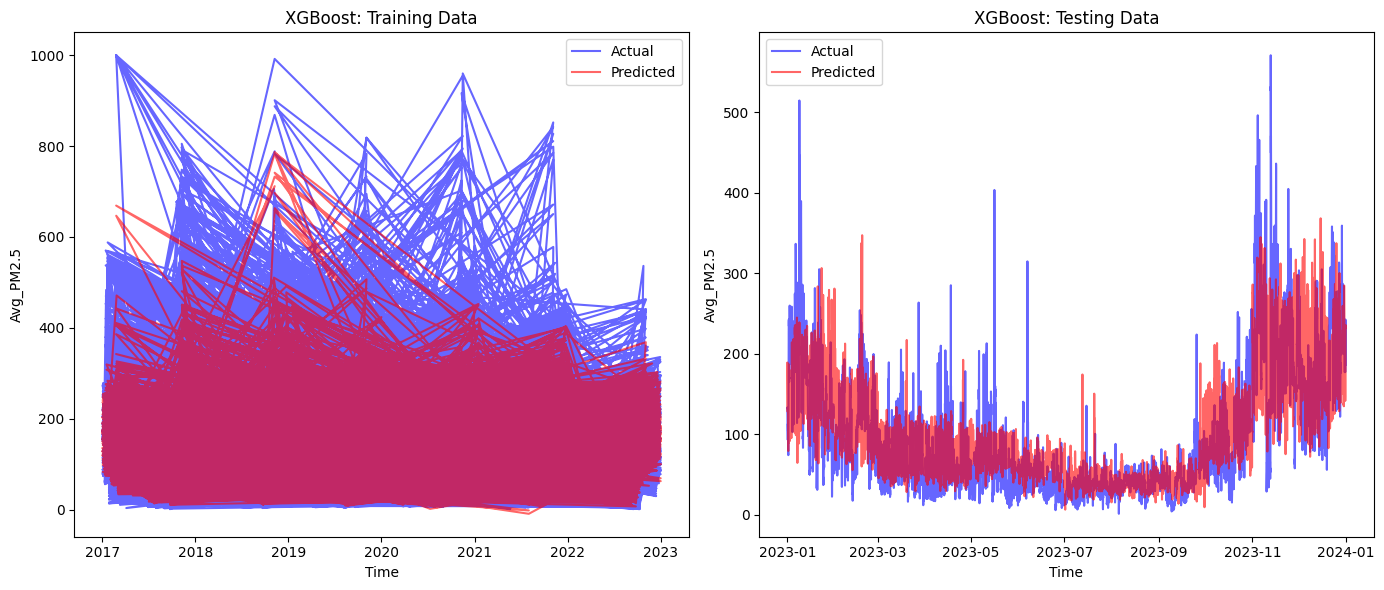

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Load only necessary columns
file_path = '/content/Updated_Dataset_Linear_Interpolation.xlsx'
usecols = ['Timestamp', 'Avg_AT (°C)', 'Avg_VWS (m/s)', 'Avg_RH (%)', 'Avg_SR (W/mt2)', 'AVG_TOT-RF (mm)', 'Avg_PM2.5']
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=usecols)

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Add time-based features
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month

# Month-based weights
month_weights = {
    1: 1.0, 2: 0.8, 3: 0.6, 4: 0.4, 5: 0.2, 6: 0.1,
    7: 0.1, 8: 0.1, 9: 0.2, 10: 0.6, 11: 0.9, 12: 1.0
}
df['PM2.5_month_weight'] = df['month'].map(month_weights)

# Hour-based weights
hour_weights = {
    0: 0.9, 1: 0.9, 2: 0.9, 3: 0.9, 4: 0.8, 5: 0.7, 6: 0.6,
    7: 0.5, 8: 0.5, 9: 0.4, 10: 0.3, 11: 0.3, 12: 0.3,
    13: 0.3, 14: 0.2, 15: 0.2, 16: 0.3, 17: 0.4, 18: 0.5,
    19: 0.6, 20: 0.7, 21: 0.8, 22: 0.9, 23: 0.9
}
df['PM2.5_hour_weight'] = df['hour'].map(hour_weights)



# Define features and target
features = [
    'Avg_AT (°C)', 'Avg_VWS (m/s)', 'Avg_RH (%)', 'Avg_SR (W/mt2)', 'AVG_TOT-RF (mm)',
    'hour', 'day_of_week', 'month'
]
target = 'Avg_PM2.5'



# Split into training and test sets
train_data = df[df['Timestamp'].dt.year <= 2022].sample(frac=1, random_state=42)  # Full training data
test_data = df[df['Timestamp'].dt.year == 2023]  # Full test data

X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# Extract Timestamps for visualization
train_time = train_data['Timestamp']
test_time = test_data['Timestamp']

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42, eval_metric="rmse")

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

# Visualization of actual vs predicted values
plt.figure(figsize=(14, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.plot(train_time, y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_time, y_train_pred, label='Predicted', alpha=0.6, color='red')
plt.title("XGBoost: Training Data")
plt.xlabel("Time")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Plot for testing data
plt.subplot(1, 2, 2)
plt.plot(test_time, y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_time, y_test_pred, label='Predicted', alpha=0.6, color='red')
plt.title("XGBoost: Testing Data")
plt.xlabel("Time")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the data
file_path = '/content/Updated_Dataset_Linear_Interpolation.xlsx'

# Define the columns to load
usecols = [
    'Timestamp', 'Avg_AT (°C)', 'Avg_VWS (m/s)', 'Avg_RH (%)',
    'Avg_SR (W/mt2)', 'AVG_TOT-RF (mm)', 'Avg_PM2.5'
]

# Load data using pandas
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=usecols)

# Display the first few rows of the dataset
print(df.head())


            Timestamp   Avg_PM2.5  Avg_AT (°C)  Avg_VWS (m/s)  Avg_RH (%)  \
0 2017-01-01 00:00:00  205.510000       12.890           0.35   92.500000   
1 2017-01-01 01:00:00  190.930000       12.230           0.39   92.836667   
2 2017-01-01 02:00:00  174.400000       12.065           0.37   93.656667   
3 2017-01-01 03:00:00  154.893333       10.980           0.40   93.010000   
4 2017-01-01 04:00:00  154.800000       10.170           0.39   93.703333   

   Avg_SR (W/mt2)  AVG_TOT-RF (mm)  
0        6.976667              0.0  
1        7.710000              0.0  
2        8.483333              0.0  
3        8.366667              0.0  
4        8.260000              0.0  


In [ ]:
# Step 2: Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create new features from the timestamp
df['hour'] = df['Timestamp'].dt.hour  # Extract hour of the day
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['Timestamp'].dt.month  # Month (1=January, 12=December)

# Display the updated dataset
print(df.head())


            Timestamp   Avg_PM2.5  Avg_AT (°C)  Avg_VWS (m/s)  Avg_RH (%)  \
0 2017-01-01 00:00:00  205.510000       12.890           0.35   92.500000   
1 2017-01-01 01:00:00  190.930000       12.230           0.39   92.836667   
2 2017-01-01 02:00:00  174.400000       12.065           0.37   93.656667   
3 2017-01-01 03:00:00  154.893333       10.980           0.40   93.010000   
4 2017-01-01 04:00:00  154.800000       10.170           0.39   93.703333   

   Avg_SR (W/mt2)  AVG_TOT-RF (mm)  hour  day_of_week  month  
0        6.976667              0.0     0            6      1  
1        7.710000              0.0     1            6      1  
2        8.483333              0.0     2            6      1  
3        8.366667              0.0     3            6      1  
4        8.260000              0.0     4            6      1  


In [ ]:
# Step 3: Assign month-based weights
month_weights = {
    1: 1.0, 2: 0.8, 3: 0.6, 4: 0.4, 5: 0.2, 6: 0.1,
    7: 0.1, 8: 0.1, 9: 0.2, 10: 0.6, 11: 0.9, 12: 1.0
}
df['PM2.5_month_weight'] = df['month'].map(month_weights)

# Assign hour-based weights
hour_weights = {
    0: 0.9, 1: 0.9, 2: 0.9, 3: 0.9, 4: 0.8, 5: 0.7, 6: 0.6,
    7: 0.5, 8: 0.5, 9: 0.4, 10: 0.3, 11: 0.3, 12: 0.3,
    13: 0.3, 14: 0.2, 15: 0.2, 16: 0.3, 17: 0.4, 18: 0.5,
    19: 0.6, 20: 0.7, 21: 0.8, 22: 0.9, 23: 0.9
}
df['PM2.5_hour_weight'] = df['hour'].map(hour_weights)

# Display the updated dataset
print(df.head())


            Timestamp   Avg_PM2.5  Avg_AT (°C)  Avg_VWS (m/s)  Avg_RH (%)  \
0 2017-01-01 00:00:00  205.510000       12.890           0.35   92.500000   
1 2017-01-01 01:00:00  190.930000       12.230           0.39   92.836667   
2 2017-01-01 02:00:00  174.400000       12.065           0.37   93.656667   
3 2017-01-01 03:00:00  154.893333       10.980           0.40   93.010000   
4 2017-01-01 04:00:00  154.800000       10.170           0.39   93.703333   

   Avg_SR (W/mt2)  AVG_TOT-RF (mm)  hour  day_of_week  month  \
0        6.976667              0.0     0            6      1   
1        7.710000              0.0     1            6      1   
2        8.483333              0.0     2            6      1   
3        8.366667              0.0     3            6      1   
4        8.260000              0.0     4            6      1   

   PM2.5_month_weight  PM2.5_hour_weight  
0                 1.0                0.9  
1                 1.0                0.9  
2                 1.0  

In [ ]:
# Step 4: Split data into training and testing sets
train_data = df[df['Timestamp'].dt.year <= 2022]  # Training data
test_data = df[df['Timestamp'].dt.year == 2023]  # Testing data

# Define features and target variable
features = [
    'Avg_AT (°C)', 'Avg_VWS (m/s)', 'Avg_RH (%)',
    'Avg_SR (W/mt2)', 'AVG_TOT-RF (mm)', 'hour',
    'day_of_week', 'month'
]
target = 'Avg_PM2.5'

# Separate features (X) and target (y)
X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values


Decision Tree Train R²: 0.6102562325798264
Decision Tree Test R²: 0.39385311190700434


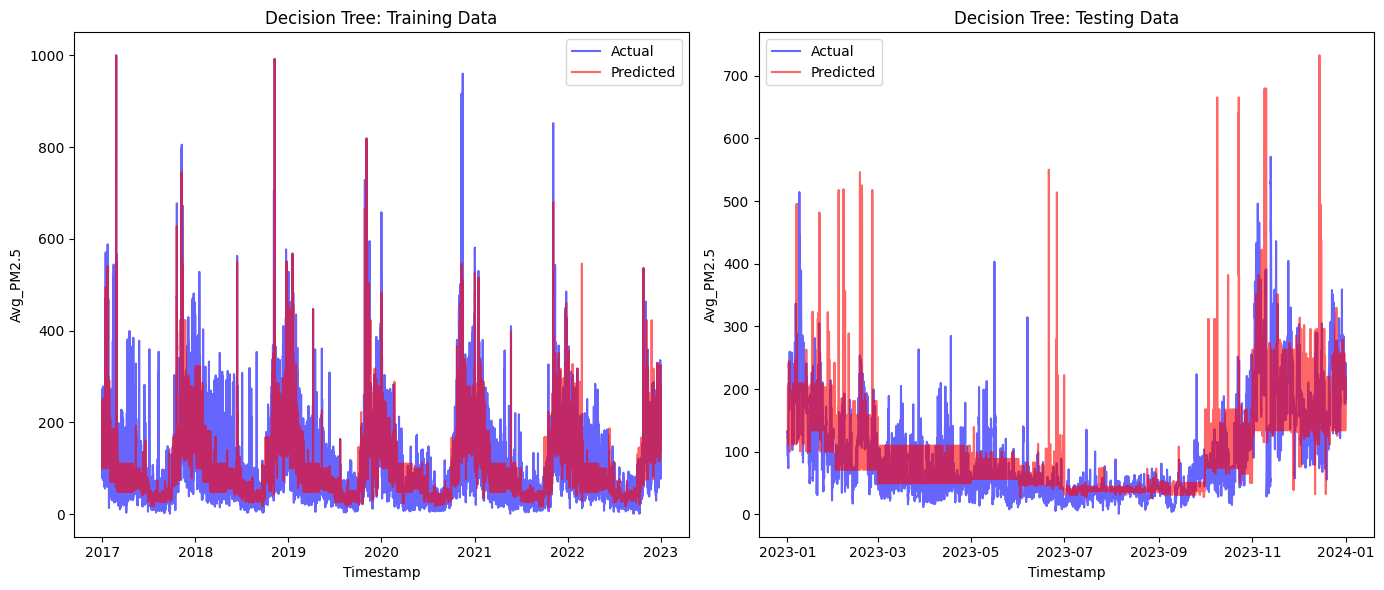

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_train_pred_tree = decision_tree.predict(X_train)
y_test_pred_tree = decision_tree.predict(X_test)

# Calculate R² scores
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

print(f"Decision Tree Train R²: {r2_train_tree}")
print(f"Decision Tree Test R²: {r2_test_tree}")

# Visualization for Decision Tree
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_tree, label='Predicted', alpha=0.6, color='red')
plt.title("Decision Tree: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_tree, label='Predicted', alpha=0.6, color='red')
plt.title("Decision Tree: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


Random Forest Train R²: 0.6541672723464964
Random Forest Test R²: 0.5595319588547192


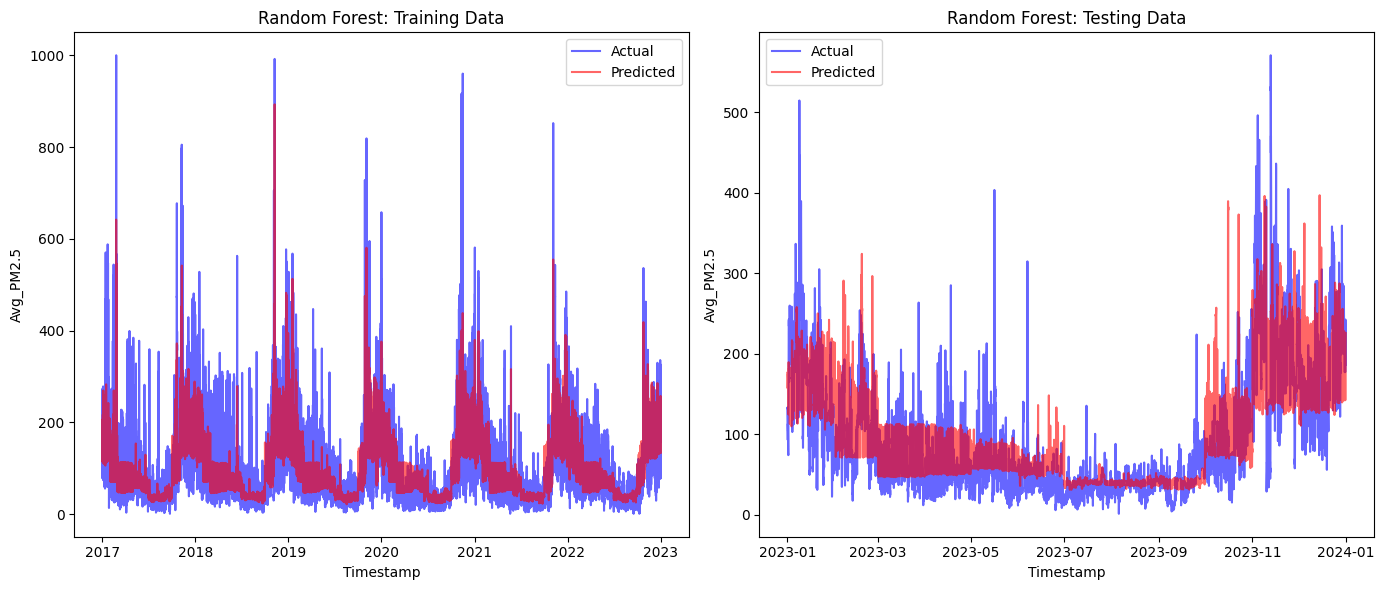

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Calculate R² scores
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Train R²: {r2_train_rf}")
print(f"Random Forest Test R²: {r2_test_rf}")

# Visualization for Random Forest
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_rf, label='Predicted', alpha=0.6, color='red')
plt.title("Random Forest: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_rf, label='Predicted', alpha=0.6, color='red')
plt.title("Random Forest: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


XGBoost Train R²: 0.9604059252438852
XGBoost Test R²: 0.3875920662210146


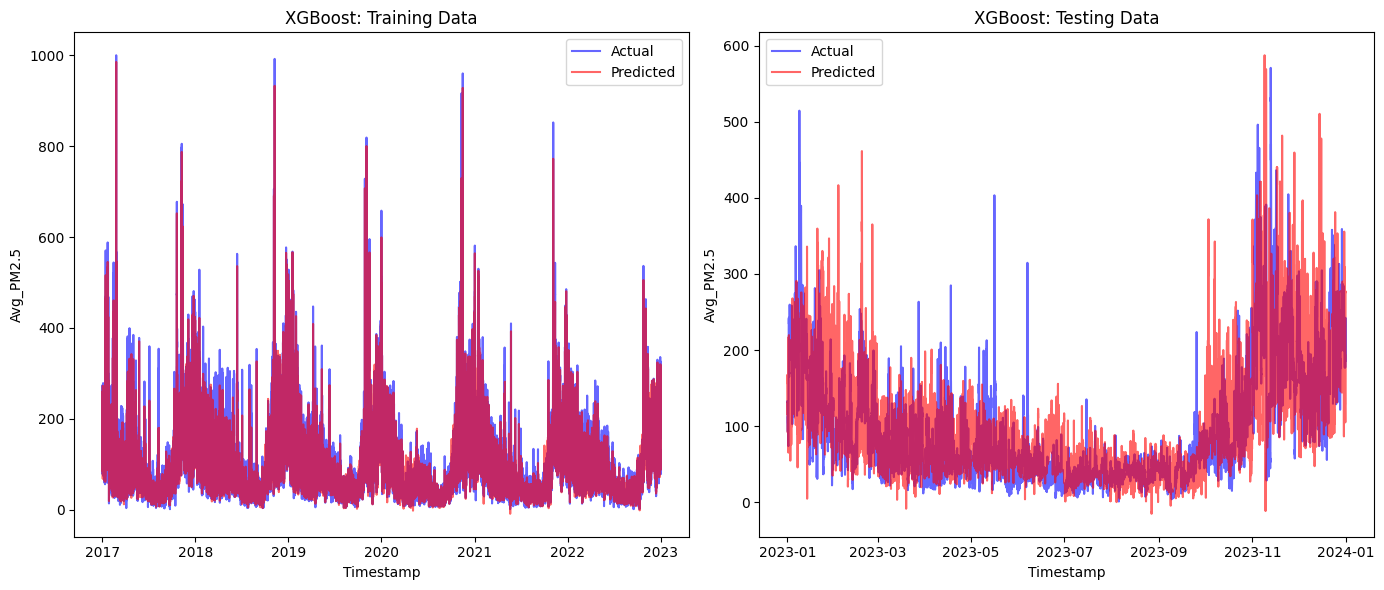

In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgboost = XGBRegressor(n_estimators=100, max_depth=10, random_state=42, eval_metric='rmse')

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions
y_train_pred_xgb = xgboost.predict(X_train)
y_test_pred_xgb = xgboost.predict(X_test)

# Calculate R² scores
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost Train R²: {r2_train_xgb}")
print(f"XGBoost Test R²: {r2_test_xgb}")

# Visualization for XGBoost
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_xgb, label='Predicted', alpha=0.6, color='red')
plt.title("XGBoost: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_xgb, label='Predicted', alpha=0.6, color='red')
plt.title("XGBoost: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the data
file_path = '/content/Updated_Dataset_Linear_Interpolation.xlsx'

# Define the columns to load
usecols = [
    'Timestamp', 'Avg_AT (°C)', 'Avg_VWS (m/s)', 'Avg_RH (%)',
    'Avg_SR (W/mt2)', 'AVG_TOT-RF (mm)', 'Avg_PM2.5'
]

# Load data using pandas
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=usecols)

# Display the first few rows of the dataset
print(df.head())


In [ ]:
# Step 2: Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create new features from the timestamp
df['hour'] = df['Timestamp'].dt.hour  # Extract hour of the day
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['Timestamp'].dt.month  # Month (1=January, 12=December)

# Display the updated dataset
print(df.head())


In [ ]:
# Step 3: Assign month-based weights
month_weights = {
    1: 1.0, 2: 0.8, 3: 0.6, 4: 0.4, 5: 0.2, 6: 0.1,
    7: 0.1, 8: 0.1, 9: 0.2, 10: 0.6, 11: 0.9, 12: 1.0
}
df['PM2.5_month_weight'] = df['month'].map(month_weights)

# Assign hour-based weights
hour_weights = {
    0: 0.9, 1: 0.9, 2: 0.9, 3: 0.9, 4: 0.8, 5: 0.7, 6: 0.6,
    7: 0.5, 8: 0.5, 9: 0.4, 10: 0.3, 11: 0.3, 12: 0.3,
    13: 0.3, 14: 0.2, 15: 0.2, 16: 0.3, 17: 0.4, 18: 0.5,
    19: 0.6, 20: 0.7, 21: 0.8, 22: 0.9, 23: 0.9
}
df['PM2.5_hour_weight'] = df['hour'].map(hour_weights)

# Display the updated dataset
print(df.head())


In [ ]:
# Step 4: Split data into training and testing sets
train_data = df[df['Timestamp'].dt.year <= 2022]  # Training data
test_data = df[df['Timestamp'].dt.year == 2023]  # Testing data

# Define features and target variable
features = [
    'Avg_AT (°C)', 'Avg_VWS (m/s)', 'Avg_RH (%)',
    'Avg_SR (W/mt2)', 'AVG_TOT-RF (mm)', 'hour',
    'day_of_week', 'month'
]
target = 'Avg_PM2.5'

# Separate features (X) and target (y)
X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values


DEEP LEARING STARTRS FROM HERE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),  # First hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = ann_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8746.6836 - mae: 63.8779 - val_loss: 3053.7563 - val_mae: 41.1446
Epoch 2/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5069.8755 - mae: 46.3038 - val_loss: 2806.5898 - val_mae: 38.5284
Epoch 3/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4762.5898 - mae: 44.5197 - val_loss: 2840.8586 - val_mae: 38.3628
Epoch 4/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4759.5088 - mae: 43.6252 - val_loss: 2804.1213 - val_mae: 37.9686
Epoch 5/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4711.3726 - mae: 43.8450 - val_loss: 2774.7126 - val_mae: 38.1506
Epoch 6/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4861.5825 - mae: 43.7899 - val_loss: 2719.3257 - val_mae: 37.2612
Epoch 7/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4614.3906 - mae: 42.9359 - val_loss: 2547.0168 - val_mae: 35.3034
Epoch 8/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4648.8198 - mae: 42.7339 - val_loss: 2639.

1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN Train R²: 0.4570044994943979
ANN Test R²: 0.5457277301345814


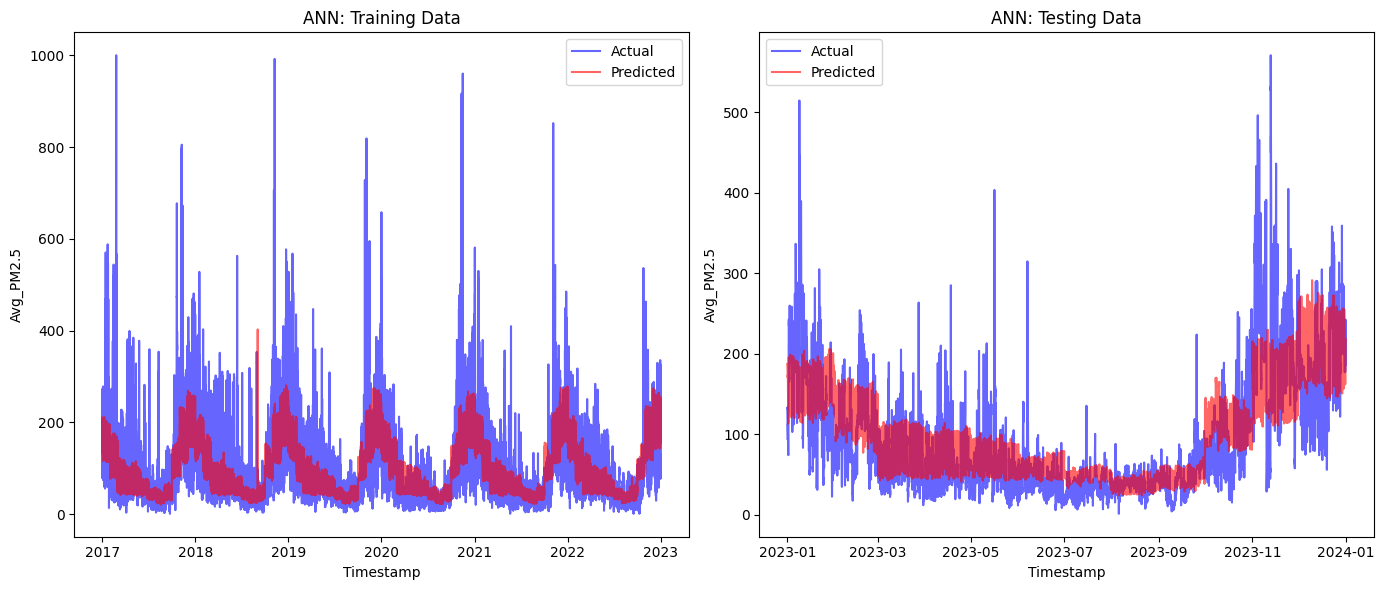

In [ ]:
# Make predictions
y_train_pred_ann = ann_model.predict(X_train_scaled).flatten()
y_test_pred_ann = ann_model.predict(X_test_scaled).flatten()

# Calculate R² scores
r2_train_ann = r2_score(y_train, y_train_pred_ann)
r2_test_ann = r2_score(y_test, y_test_pred_ann)

print(f"ANN Train R²: {r2_train_ann}")
print(f"ANN Test R²: {r2_test_ann}")

# Visualization for ANN
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_ann, label='Predicted', alpha=0.6, color='red')
plt.title("ANN: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_ann, label='Predicted', alpha=0.6, color='red')
plt.title("ANN: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


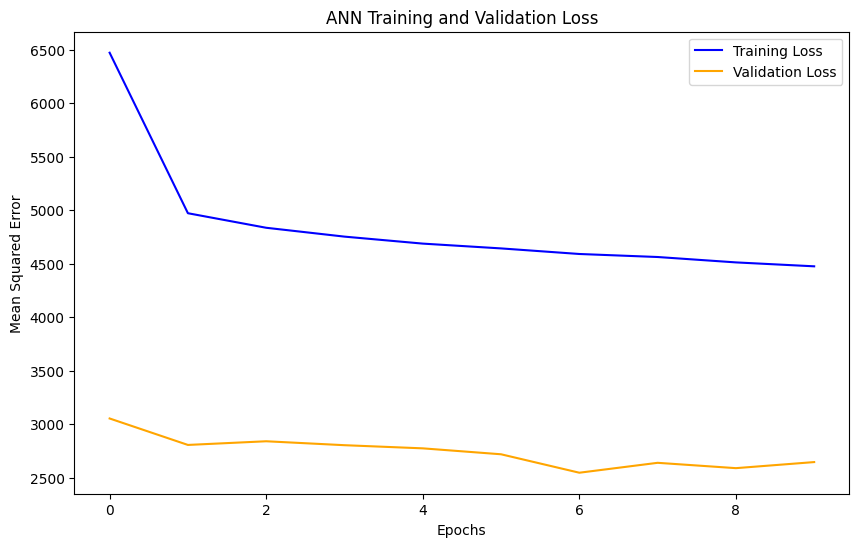

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("ANN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


WITH CNN DEEP LEARNIGN MODEL


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout


In [ ]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN: (samples, timesteps=1, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [ ]:
# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),  # Dropout for regularization
    Flatten(),  # Flatten the output
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9650.0479 - mae: 67.0134 - val_loss: 3073.7498 - val_mae: 40.8930
Epoch 2/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5050.6416 - mae: 46.9244 - val_loss: 2891.5876 - val_mae: 38.9127
Epoch 3/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4810.2593 - mae: 45.0520 - val_loss: 2905.3523 - val_mae: 39.1395
Epoch 4/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4749.7319 - mae: 44.0133 - val_loss: 2815.3955 - val_mae: 38.1590
Epoch 5/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4752.7275 - mae: 43.8217 - val_loss: 2797.0862 - val_mae: 38.1161
Epoch 6/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4591.1006 - mae: 43.3240 - val_loss: 2834.0967 - val_mae: 38.3165
Epoch 7/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4818.0776 - mae: 43.7260 - val_loss: 2772.3770 - val_mae: 37.4637
Epoch 8/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4706.5894 - mae: 43.1522 - val_loss: 2700.

1644/1644 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN Train R²: 0.4508868876659421
CNN Test R²: 0.5409982316737305


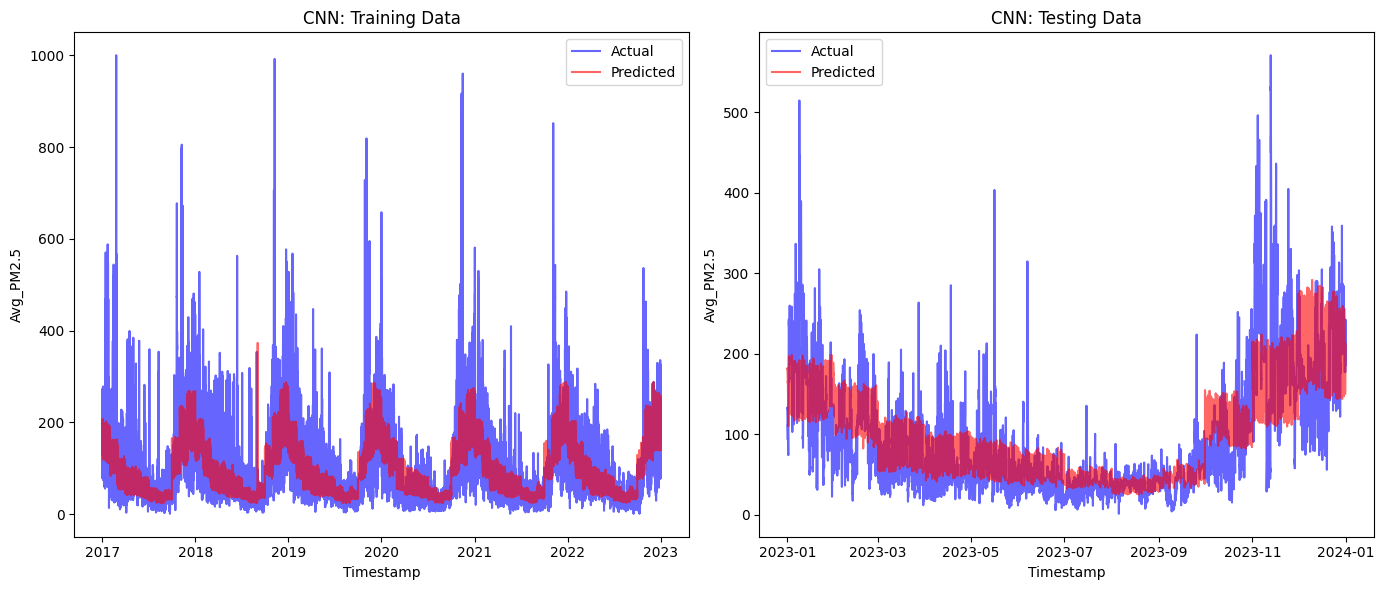

In [ ]:
# Make predictions
y_train_pred_cnn = cnn_model.predict(X_train_cnn).flatten()
y_test_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

# Calculate R² scores
r2_train_cnn = r2_score(y_train, y_train_pred_cnn)
r2_test_cnn = r2_score(y_test, y_test_pred_cnn)

print(f"CNN Train R²: {r2_train_cnn}")
print(f"CNN Test R²: {r2_test_cnn}")

# Visualization for CNN
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_cnn, label='Predicted', alpha=0.6, color='red')
plt.title("CNN: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_cnn, label='Predicted', alpha=0.6, color='red')
plt.title("CNN: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


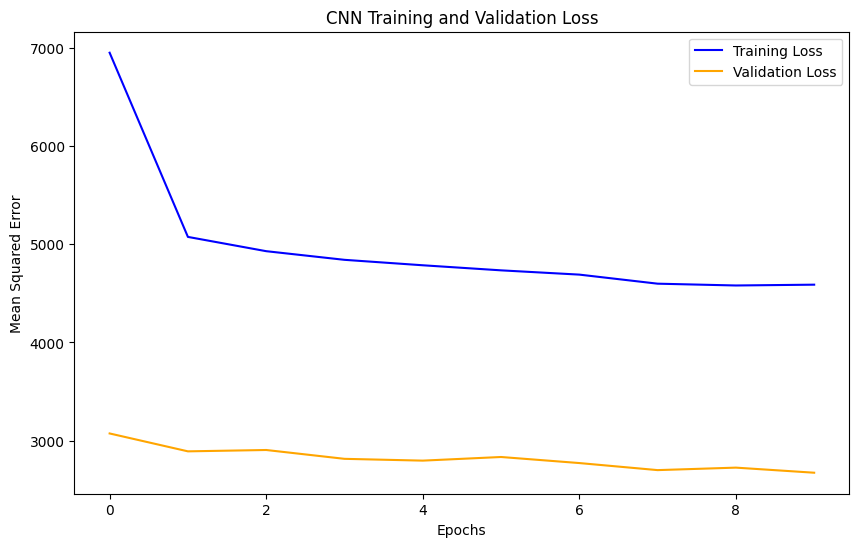

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("CNN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


LSTM MODEL USED


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM: (samples, timesteps, features)
timesteps = 1  # You can adjust this based on your requirements
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1])


In [ ]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, X_train_scaled.shape[1]), return_sequences=False),
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5262.9507 - mae: 48.5058 - val_loss: 2979.1567 - val_mae: 39.9493
Epoch 2/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4959.8896 - mae: 46.0993 - val_loss: 2853.7700 - val_mae: 38.4152
Epoch 3/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4974.1724 - mae: 45.3071 - val_loss: 2830.2678 - val_mae: 38.4340
Epoch 4/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4740.4053 - mae: 44.4212 - val_loss: 2828.3625 - val_mae: 37.8864
Epoch 5/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4725.9233 - mae: 43.9274 - val_loss: 2823.8213 - val_mae: 38.0734
Epoch 6/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4654.4321 - mae: 43.6565 - val_loss: 2772.0667 - val_mae: 37.4669
Epoch 7/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 4731.6836 - mae: 43.9639 - val_loss: 2728.5793 - val_mae: 37.2496
Epoch 8/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4811.3706 - mae: 44.0559 - val_loss: 27

1644/1644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Train R²: 0.4372213285112997
LSTM Test R²: 0.5389540329180904


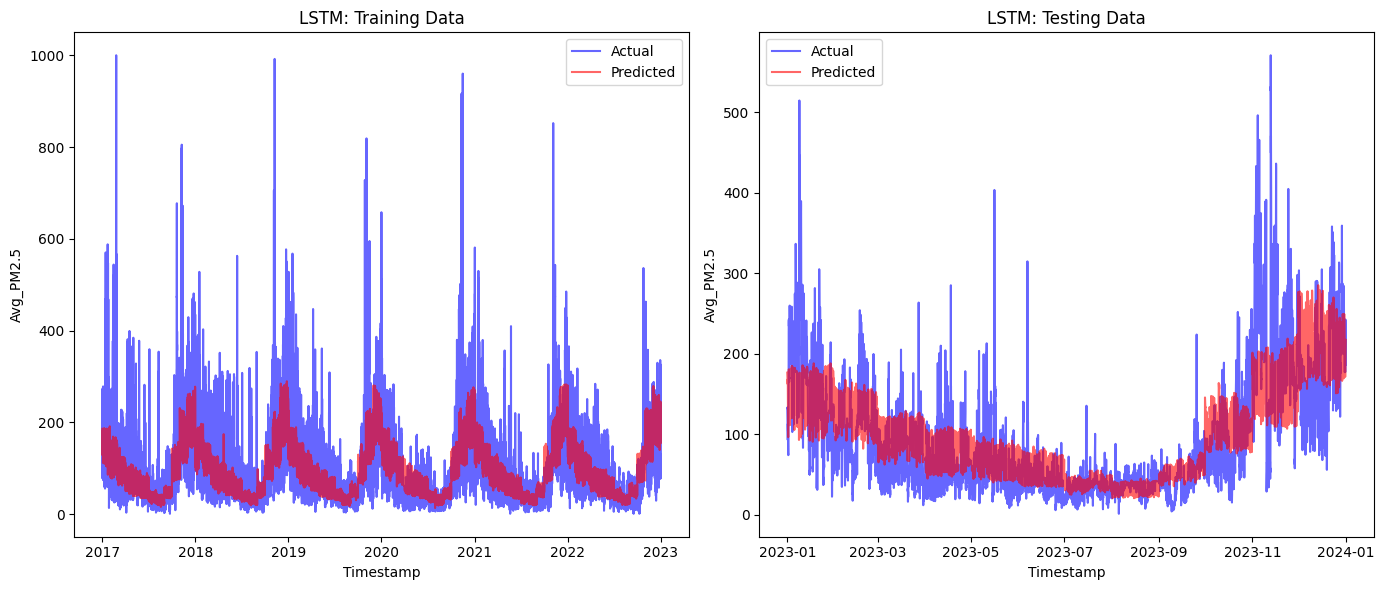

In [ ]:
# Make predictions
y_train_pred_lstm = lstm_model.predict(X_train_lstm).flatten()
y_test_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate R² scores
r2_train_lstm = r2_score(y_train, y_train_pred_lstm)
r2_test_lstm = r2_score(y_test, y_test_pred_lstm)

print(f"LSTM Train R²: {r2_train_lstm}")
print(f"LSTM Test R²: {r2_test_lstm}")

# Visualization for LSTM
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


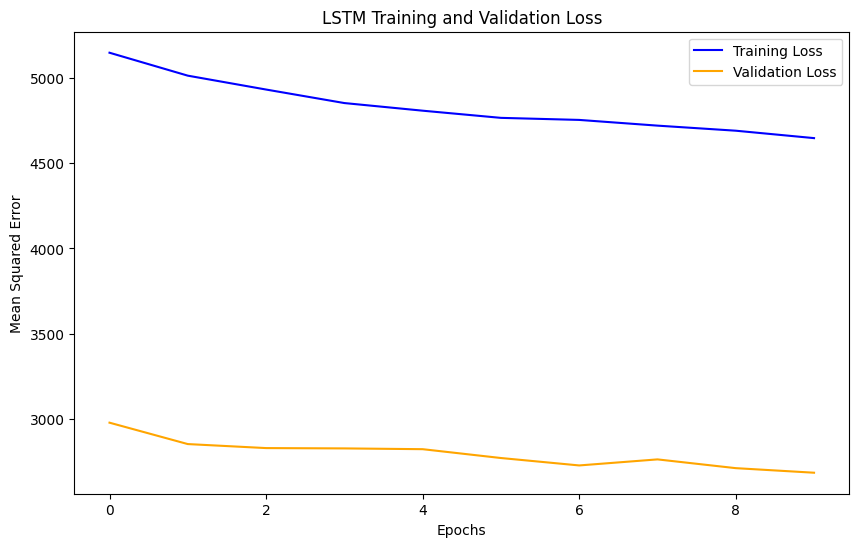

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


LSTM WITH 3 TIME STAMPS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
# Define timesteps
timesteps = 3

# Function to create sequences with multiple timesteps
def create_sequences(features, target, timesteps):
    X, y = [], []
    for i in range(len(features) - timesteps):
        X.append(features[i:i + timesteps])
        y.append(target[i + timesteps])
    return np.array(X), np.array(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply the function to create sequences
X_train_lstm, y_train_lstm = create_sequences(X_scaled, y_train, timesteps)

# Scale and create sequences for test data
X_test_scaled = scaler.transform(X_test)
X_test_lstm, y_test_lstm = create_sequences(X_test_scaled, y_test, timesteps)

# Check the shapes
print(f"X_train_lstm shape: {X_train_lstm.shape}")  # (samples, timesteps, features)
print(f"y_train_lstm shape: {y_train_lstm.shape}")


X_train_lstm shape: (52581, 3, 8)
y_train_lstm shape: (52581,)


In [ ]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, X_train_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 7750.2798 - mae: 58.3547 - val_loss: 2826.2136 - val_mae: 37.2054
Epoch 2/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 4872.8960 - mae: 44.6521 - val_loss: 2874.5854 - val_mae: 38.0325
Epoch 3/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 4781.8740 - mae: 43.9820 - val_loss: 2749.2952 - val_mae: 35.4541
Epoch 4/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 4747.1914 - mae: 43.6491 - val_loss: 2852.7961 - val_mae: 37.5703
Epoch 5/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 4604.1396 - mae: 43.2903 - val_loss: 2796.7625 - val_mae: 37.6828
Epoch 6/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 4543.8467 - mae: 42.7818 - val_loss: 2739.3752 - val_mae: 37.1109
Epoch 7/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 4658.9429 - mae: 42.4985 - val_loss: 2532.5676 - val_mae: 35.5770
Epoch 8/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 4284.8032 - mae: 41.5352 - val_los

1644/1644 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Train R²: 0.46580083986954135
LSTM Test R²: 0.5343378790887652


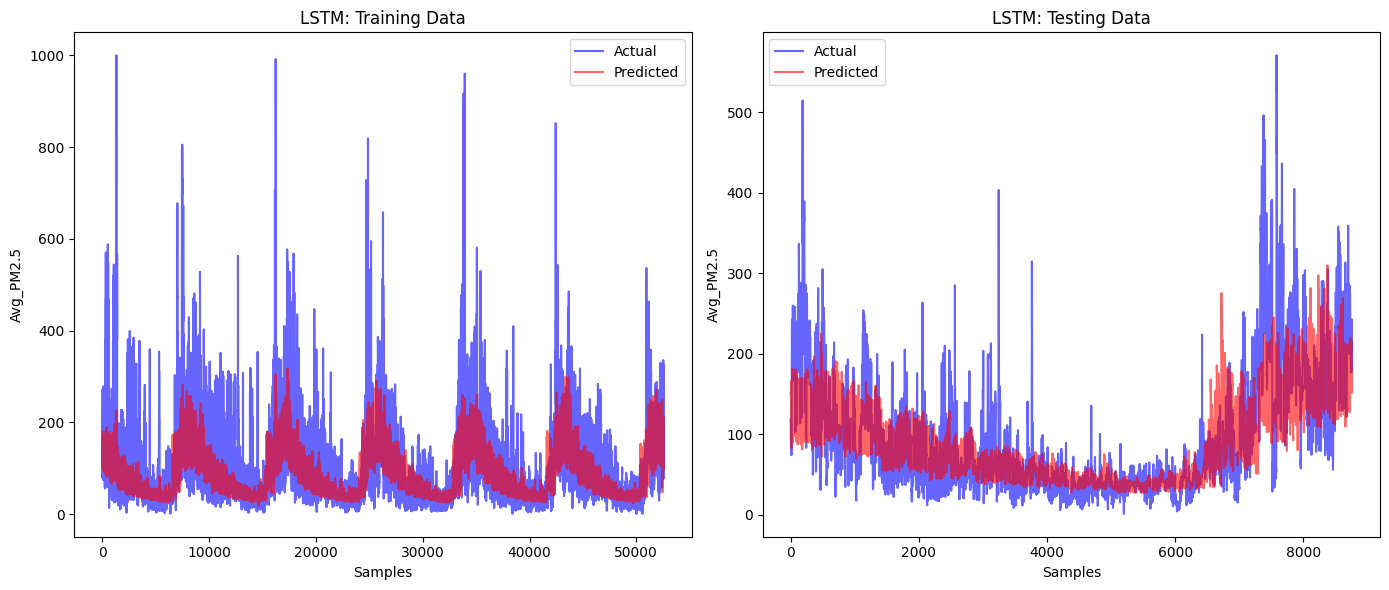

In [ ]:
# Make predictions
y_train_pred_lstm = lstm_model.predict(X_train_lstm).flatten()
y_test_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate R² scores
r2_train_lstm = r2_score(y_train_lstm, y_train_pred_lstm)
r2_test_lstm = r2_score(y_test_lstm, y_test_pred_lstm)

print(f"LSTM Train R²: {r2_train_lstm}")
print(f"LSTM Test R²: {r2_test_lstm}")

# Visualization for LSTM
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(range(len(y_train_lstm)), y_train_lstm, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_train_pred_lstm)), y_train_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Training Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_lstm)), y_test_lstm, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_test_pred_lstm)), y_test_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Testing Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


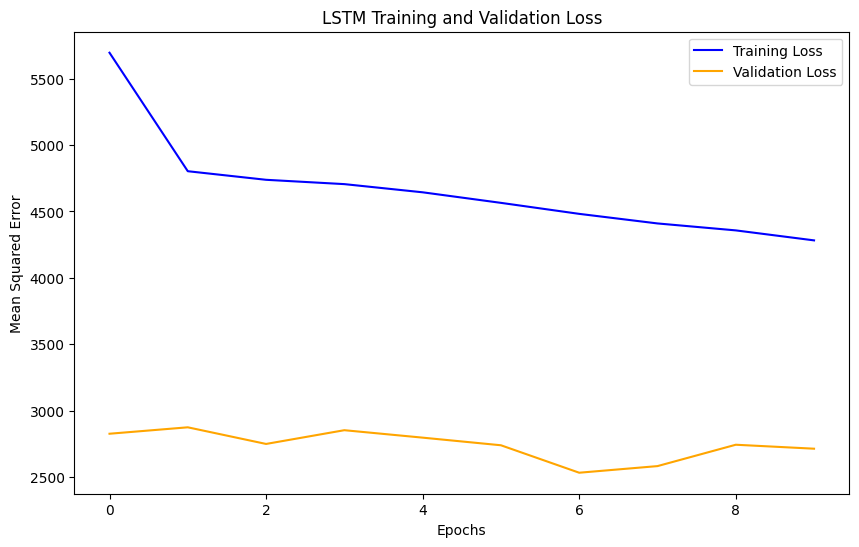

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


CNN WITH LSTM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten


In [ ]:
# Define timesteps
timesteps = 3

# Function to create sequences with multiple timesteps
def create_sequences(features, target, timesteps):
    X, y = [], []
    for i in range(len(features) - timesteps):
        X.append(features[i:i + timesteps])
        y.append(target[i + timesteps])
    return np.array(X), np.array(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply the function to create sequences
X_train_hybrid, y_train_hybrid = create_sequences(X_scaled, y_train, timesteps)

# Scale and create sequences for test data
X_test_scaled = scaler.transform(X_test)
X_test_hybrid, y_test_hybrid = create_sequences(X_test_scaled, y_test, timesteps)

# Check the shapes
print(f"X_train_hybrid shape: {X_train_hybrid.shape}")  # (samples, timesteps, features)
print(f"y_train_hybrid shape: {y_train_hybrid.shape}")


X_train_hybrid shape: (52581, 3, 8)
y_train_hybrid shape: (52581,)


In [ ]:
# Define LSTM-CNN model
hybrid_model = Sequential([
    # Convolutional layer
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, X_train_hybrid.shape[2])),
    Dropout(0.2),  # Dropout for regularization

    # LSTM layer
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),

    # Fully connected layers
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
hybrid_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = hybrid_model.fit(
    X_train_hybrid, y_train_hybrid,
    validation_data=(X_test_hybrid, y_test_hybrid),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 5590.0215 - mae: 48.9313 - val_loss: 2844.4619 - val_mae: 37.0577
Epoch 2/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 4956.7334 - mae: 44.5685 - val_loss: 2766.3064 - val_mae: 36.8651
Epoch 3/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4791.5518 - mae: 43.5608 - val_loss: 2739.3823 - val_mae: 37.0859
Epoch 4/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 4651.7759 - mae: 43.1481 - val_loss: 2666.0674 - val_mae: 35.7348
Epoch 5/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4476.1528 - mae: 42.5875 - val_loss: 2507.1057 - val_mae: 34.7636
Epoch 6/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 4505.3721 - mae: 42.3470 - val_loss: 2645.9204 - val_mae: 37.0100
Epoch 7/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 4399.6265 - mae: 41.9423 - val_loss: 2538.4473 - val_mae: 36.4011
Epoch 8/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 4311.5132 - mae: 41.6009 - val_loss:

1644/1644 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Hybrid Model Train R²: 0.48797644060457657
Hybrid Model Test R²: 0.5962867839696395


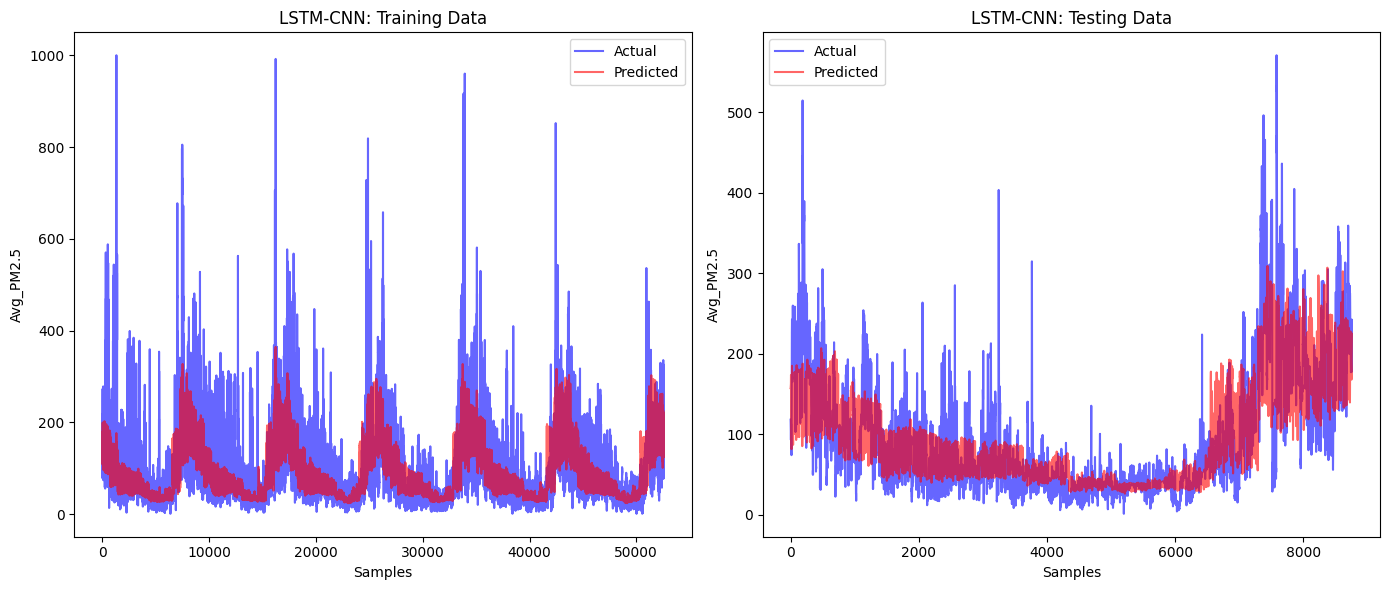

In [ ]:
# Make predictions
y_train_pred_hybrid = hybrid_model.predict(X_train_hybrid).flatten()
y_test_pred_hybrid = hybrid_model.predict(X_test_hybrid).flatten()

# Calculate R² scores
r2_train_hybrid = r2_score(y_train_hybrid, y_train_pred_hybrid)
r2_test_hybrid = r2_score(y_test_hybrid, y_test_pred_hybrid)

print(f"Hybrid Model Train R²: {r2_train_hybrid}")
print(f"Hybrid Model Test R²: {r2_test_hybrid}")

# Visualization for Hybrid Model
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(range(len(y_train_hybrid)), y_train_hybrid, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_train_pred_hybrid)), y_train_pred_hybrid, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM-CNN: Training Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_hybrid)), y_test_hybrid, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_test_pred_hybrid)), y_test_pred_hybrid, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM-CNN: Testing Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


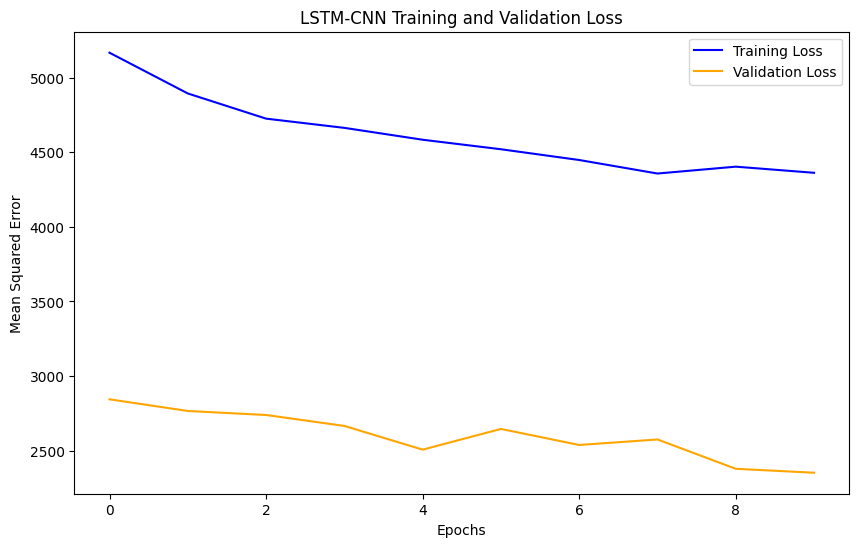

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM-CNN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()
